<h2>FRUIT RECOGNITION ALONG WITH NUTRIENTS USING DEEP LEARNING</h2>

Email- pradeepadhanam50@gmail.com

Data Augumentation

In [1]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [2]:
from PIL import Image

In [3]:
'''data=ImageDataGenerator(rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=True,
                        fill_mode='nearest')
img=load_img('/content/_r_0_274.png')
x=img_to_array(img)
x=x.reshape((1,)+x.shape)

i=0
for batch in data.flow(x,batch_size=1,save_to_dir='/content/drive/MyDrive/Fruit Classification/Sweet Potato',
                       save_prefix='_r',save_format='png'
                       ):
  #condition for how many pic  need
    i=i+1
    if i>150:
      break'''

"data=ImageDataGenerator(rotation_range=40,\n                        width_shift_range=0.2,\n                        height_shift_range=0.2,\n                        shear_range=0.2,\n                        zoom_range=0.2,\n                        horizontal_flip=True,\n                        vertical_flip=True,\n                        fill_mode='nearest')\nimg=load_img('/content/_r_0_274.png')\nx=img_to_array(img)\nx=x.reshape((1,)+x.shape)\n\ni=0\nfor batch in data.flow(x,batch_size=1,save_to_dir='/content/drive/MyDrive/Fruit Classification/Sweet Potato',\n                       save_prefix='_r',save_format='png'\n                       ):\n  #condition for how many pic  need\n    i=i+1\n    if i>150:\n      break"

Splitting the Data into Train and Test

In [ ]:
import numpy as np
from keras.utils import np_utils, to_categorical
from keras.preprocessing import image
from os import listdir
from os.path import isdir, join
import random

# NumPy array file

def load_data(container_path='/content/drive/MyDrive/Fruit Classification', folders=['Banana', 'Corn', 'Cucumber','Grapes',
                                                                                     'Guava','Lemon','Orange','Papaya','Pomegranate','Sweet Potato'],
              size=4500, test_split=0.3, seed=0):

    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])
    np.save("x_train",x_train)
    np.save("y_train",y_train)
    np.save("x_test",x_test)
    np.save("y_test",y_test)

    print("Arrays saved to disk")


    #return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)


load_data()

Arrays saved to disk


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img,img_to_array,array_to_img
from PIL import Image

In [5]:
x_train =np.load('x_train.npy')
x_test=np.load('x_test.npy')
y_train=np.load('y_train.npy')
y_test=np.load('y_test.npy')

In [6]:
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (3150, 50, 50, 3)
x_test : (1350, 50, 50, 3)
y_train : (3150,)
y_test : (1350,)


<h2>Visualization</h2>

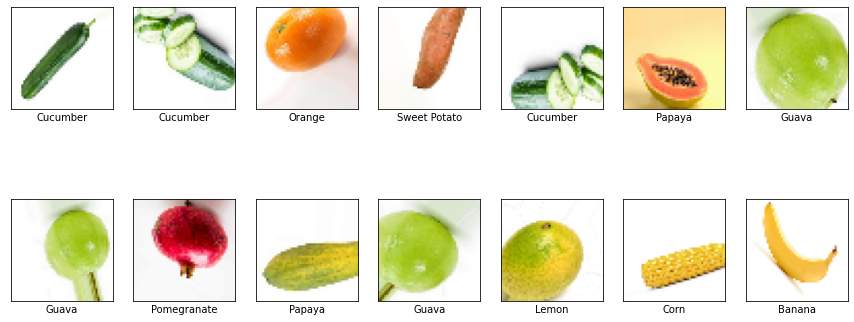

In [8]:
import random
labels={0:'Banana',1: 'Corn',2:'Cucumber',3:'Grapes',
         4:'Guava',5:'Lemon',6:'Orange',7:'Papaya',8:'Pomegranate',9:'Sweet Potato'}
plt.figure(figsize=(15,10))
for i in range(14):
  random_no=random.randint(0,x_train.shape[0])
  plt.subplot(3,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[random_no])
  plt.xlabel(labels[y_train[random_no]])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


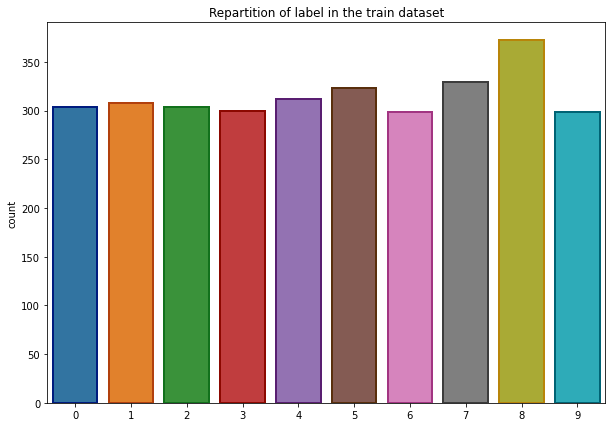

In [9]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.countplot(y_train,linewidth =2,edgecolor=sns.color_palette("dark"))
plt.title('Repartition of label in the train dataset')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


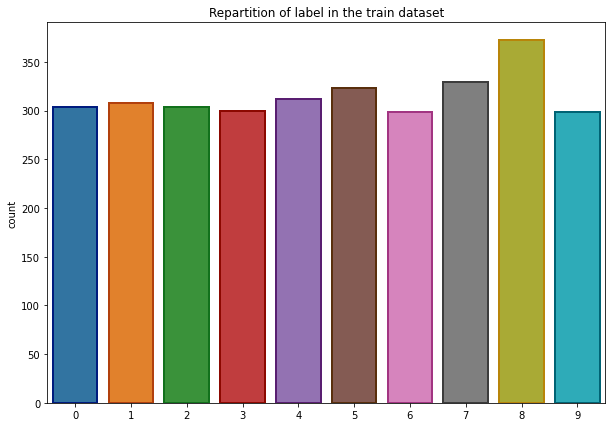

In [10]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.countplot(y_train,linewidth =2,edgecolor=sns.color_palette("dark"))
plt.title('Repartition of label in the train dataset')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Repartition of label in the Test Data')

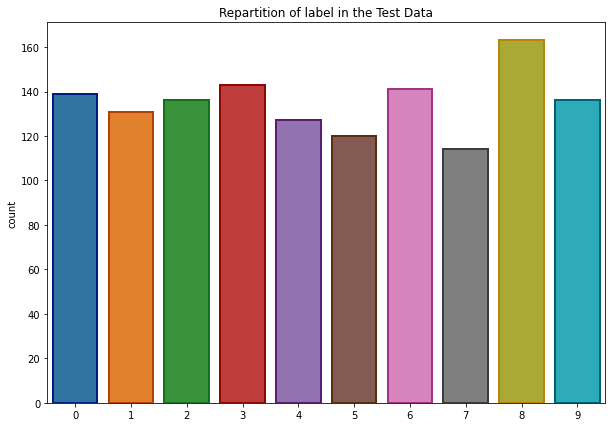

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(y_test,linewidth=2,edgecolor=sns.color_palette("dark"))
plt.title('Repartition of label in the Test Data')

In [12]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential

In [13]:
pip install np_utils

<h2>Define the Model</h2>

In [14]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential


from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train) # convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector
y_test = np_utils.to_categorical(y_test)

In [17]:
input_shape=(50,50,3) #(50*50 pixel)
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)         

<h2>Compile the Model</h2>

In [18]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [19]:
model.fit(x_train,y_train,epochs=15,batch_size=32,validation_split=0.3) 

Epoch 1/15
69/69 [==============================] - 34s 14ms/step - loss: 2.3222 - accuracy: 0.1642 - val_loss: 1.3978 - val_accuracy: 0.5259
Epoch 2/15
69/69 [==============================] - 0s 7ms/step - loss: 1.2282 - accuracy: 0.5325 - val_loss: 0.6510 - val_accuracy: 0.7873
Epoch 3/15
69/69 [==============================] - 0s 7ms/step - loss: 0.6519 - accuracy: 0.7412 - val_loss: 0.5229 - val_accuracy: 0.7640
Epoch 4/15
69/69 [==============================] - 0s 7ms/step - loss: 0.5146 - accuracy: 0.8059 - val_loss: 0.3476 - val_accuracy: 0.8646
Epoch 5/15
69/69 [==============================] - 0s 7ms/step - loss: 0.3275 - accuracy: 0.8687 - val_loss: 0.2906 - val_accuracy: 0.8931
Epoch 6/15
69/69 [==============================] - 0s 7ms/step - loss: 0.2477 - accuracy: 0.9012 - val_loss: 0.0969 - val_accuracy: 0.9545
Epoch 7/15
69/69 [==============================] - 0s 7ms/step - loss: 0.1321 - accuracy: 0.9540 - val_loss: 0.0953 - val_accuracy: 0.9767
Epoch 8/15
69/69 [

In [20]:
model.evaluate(x_test,y_test)

43/43 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9978


[0.010713188908994198, 0.9977777600288391]

In [21]:
y_pred=model.predict(x_test)

In [22]:
model.save('fruit_file.h5')

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpf_9l52cy/assets


In [24]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)